# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset Exploration

In [ ]:
dataset = pd.read_csv('kc_house_data.csv')

In [ ]:
dataset.info() # Not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Adding new variables

In [ ]:
dataset['sqft_backyard'] = dataset['sqft_lot']-dataset['sqft_living']

dataset = dataset.loc[:,['lat','long','condition','grade','sqft_lot','bedrooms','bathrooms'\
                         ,'sqft_living','floors','sqft_above','sqft_basement'\
                         ,'yr_built','view','sqft_backyard','price']]

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

See the data

In [ ]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

See the distributions

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'sqft_backyard'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

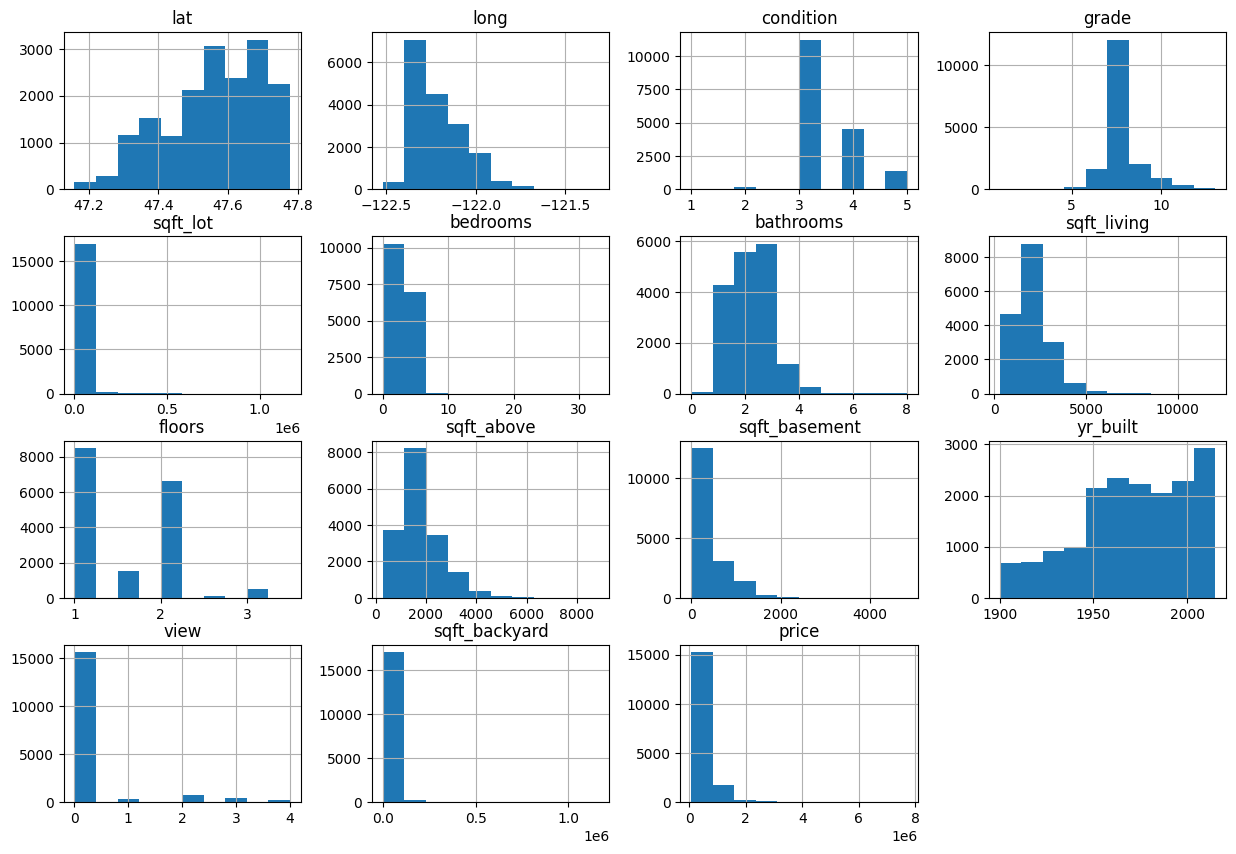

In [ ]:
train_data.hist(figsize=(15,10))

Applying logarithm to the variables who don't have a gaussian normal distribution centered

In [ ]:
# To train data

train_data['lat'] = np.log(train_data['lat'] + 1)
train_data['long'] = np.log(np.abs(train_data['long']) + 1)
train_data['condition'] = np.log(train_data['condition'] + 1)
train_data['sqft_lot'] = np.log(train_data['sqft_lot'] + 1)
train_data['bedrooms'] = np.log(train_data['bedrooms'] + 1)
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['sqft_living'] = np.log(train_data['sqft_living'] + 1)
train_data['floors'] = np.log(train_data['floors'] + 1)
train_data['sqft_above'] = np.log(train_data['sqft_above'] + 1)
train_data['sqft_basement'] = np.log(train_data['sqft_basement'] + 1)
train_data['yr_built'] = np.log(train_data['yr_built'] + 1)
train_data['view'] = np.log(train_data['view'] + 1)
train_data['sqft_backyard'] = np.log(abs(train_data['sqft_backyard']) + 1)
train_data['price'] = np.log(train_data['price'] + 1)


# To test data

test_data['lat'] = np.log(test_data['lat'] + 1)
test_data['long'] = np.log(np.abs(test_data['long']) + 1)
test_data['condition'] = np.log(test_data['condition'] + 1)
test_data['sqft_lot'] = np.log(test_data['sqft_lot'] + 1)
test_data['bedrooms'] = np.log(test_data['bedrooms'] + 1)
test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['sqft_living'] = np.log(test_data['sqft_living'] + 1)
test_data['floors'] = np.log(test_data['floors'] + 1)
test_data['sqft_above'] = np.log(test_data['sqft_above'] + 1)
test_data['sqft_basement'] = np.log(test_data['sqft_basement'] + 1)
test_data['yr_built'] = np.log(test_data['yr_built'] + 1)
test_data['view'] = np.log(test_data['view'] + 1)
test_data['sqft_backyard'] = np.log(abs(test_data['sqft_backyard'] + 1))
test_data['price'] = np.log(test_data['price'] + 1)

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'sqft_backyard'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

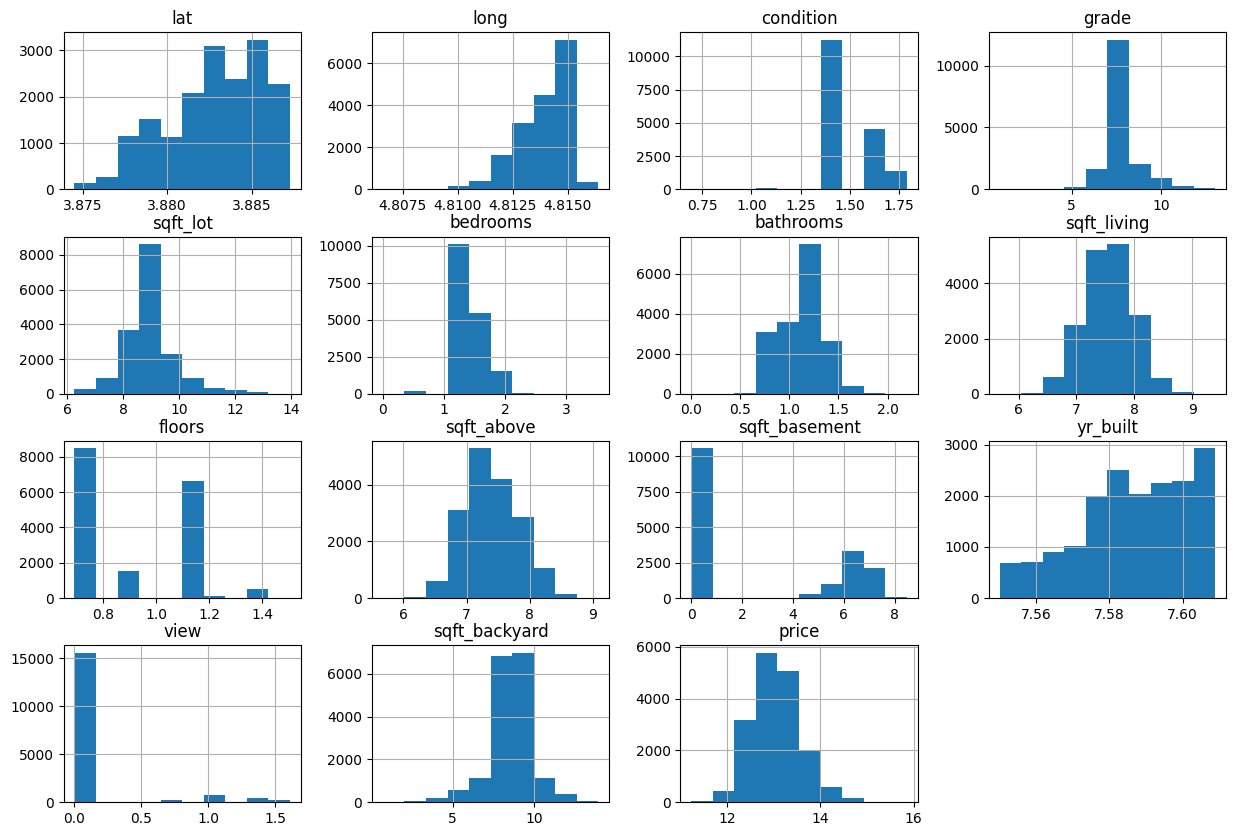

In [ ]:
train_data.hist(figsize=(15,10))

In [ ]:
train_data = train_data.loc[:,['grade','sqft_lot','bedrooms','bathrooms','sqft_living','sqft_above','sqft_backyard','price']]
test_data = test_data.loc[:,['grade','sqft_lot','bedrooms','bathrooms','sqft_living','sqft_above','sqft_backyard','price']]

In [ ]:
train_data.corr()

,grade,sqft_lot,bedrooms,bathrooms,sqft_living,sqft_above,sqft_backyard,price
grade,1.000000,0.175409,0.377398,0.653187,0.740120,0.739938,0.050633,0.700228
sqft_lot,0.175409,1.000000,0.190435,0.080796,0.321318,0.313479,0.936959,0.134151
bedrooms,0.377398,0.190435,1.000000,0.539701,0.646925,0.543331,0.128965,0.346558
bathrooms,0.653187,0.080796,0.539701,1.000000,0.763953,0.692235,-0.053321,0.531542
sqft_living,0.740120,0.321318,0.646925,0.763953,1.000000,0.865683,0.190022,0.672260
sqft_above,0.739938,0.313479,0.543331,0.692235,0.865683,1.000000,0.194030,0.582722
sqft_backyard,0.050633,0.936959,0.128965,-0.053321,0.190022,0.194030,1.000000,0.026030
price,0.700228,0.134151,0.346558,0.531542,0.672260,0.582722,0.026030,1.000000


<Axes: >

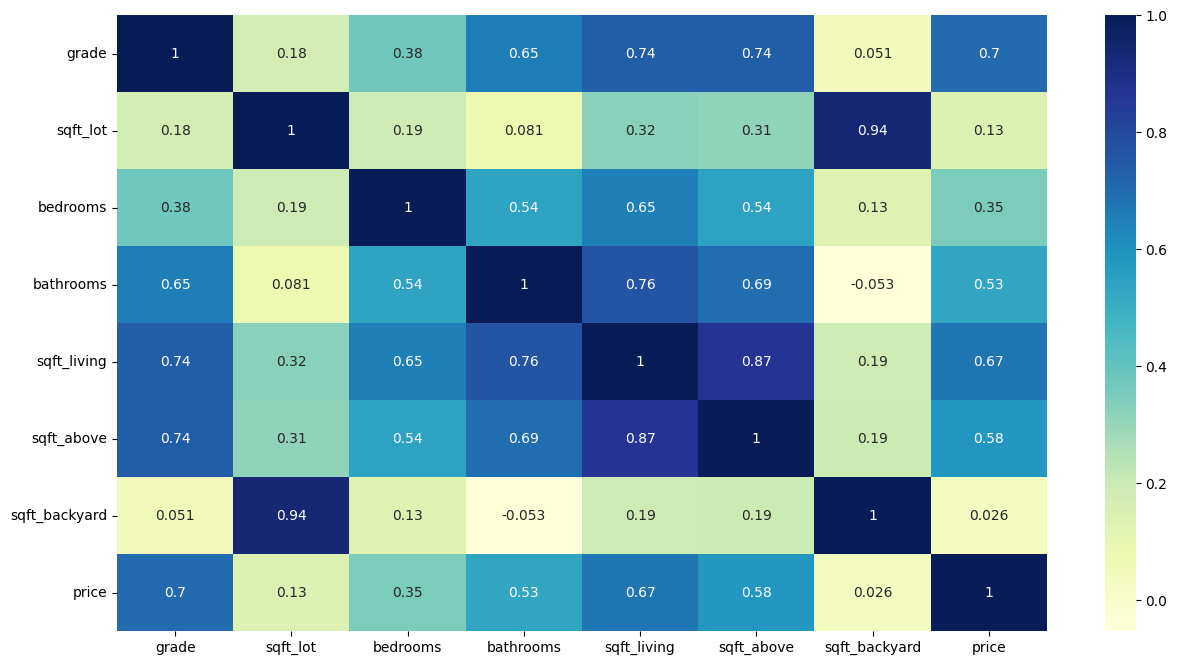

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

Deleting the correlated independent variables

In [ ]:
train_data = train_data.loc[:,['grade','bedrooms','bathrooms']]
test_data = test_data.loc[:,['grade','bedrooms','bathrooms']]

In [ ]:
print(train_data)

       grade  bedrooms  bathrooms
6325       9  1.386294   1.011601
13473      6  1.098612   0.693147
17614      6  1.386294   0.693147
16970      7  1.386294   1.178655
20868      8  1.098612   1.252763
...      ...       ...        ...
11964      7  1.386294   0.916291
21575      8  1.386294   1.252763
5390       7  1.386294   1.252763
860        5  0.693147   0.559616
15795      7  1.609438   1.252763

[17290 rows x 3 columns]


# Data preprocessing

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the test data

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),1))
print(regressor.score(X_test,y_test))

[[ 453073.62  365000.  ]
 [ 762176.08  865000.  ]
 [1252015.23 1038000.  ]
 ...
 [ 380293.11  285000.  ]
 [ 594057.36  605000.  ]
 [ 400551.76  356500.  ]]
0.6733891289969518


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = forest.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),np.array(y_test).reshape(len(y_test),1)),1))
print(forest.score(X_test,y_test))

[[ 374036.5   365000.  ]
 [ 835650.5   865000.  ]
 [1089166.5  1038000.  ]
 ...
 [ 285259.85  285000.  ]
 [ 591119.71  605000.  ]
 [ 338678.23  356500.  ]]
0.842505942592298


In [ ]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 75273.35107153322
Mean Squared Error (MSE): 23809433798.889008
Root Mean Squared Error (RMSE): 154303.05829402411
Mean Absolute Percentage Error (MAPE): 13.44
Accuracy: 86.56


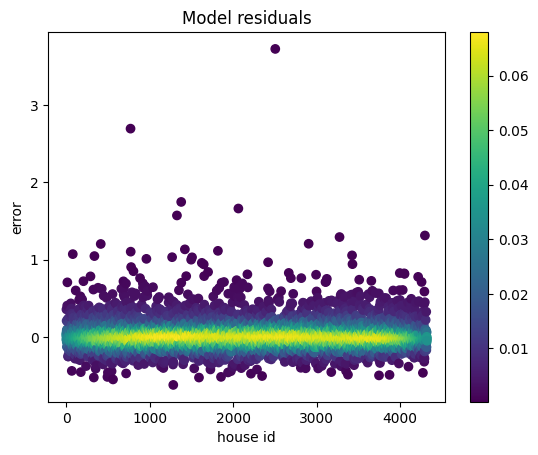

0.031024112455905507
0.20864441728793132


In [ ]:
from scipy.stats import gaussian_kde
y_test = np.array(y_test)

error = []
for i in range(len(y_pred)):
  error.append(y_pred[i]/y_test[i]-1)

x_array = np.arange(0,len(y_test),1)

data_stack = np.vstack([x_array, error])
kde = gaussian_kde(data_stack)

density = 100 * kde(data_stack)

plt.scatter(x_array,error , c = density, cmap='viridis')
plt.xlabel('house id')
plt.ylabel('error')
plt.title('Model residuals')
plt.colorbar()
plt.show()
print(np.mean(error))
print(np.std(error))

Using hyperparameters and cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators':[50,100,150],
    'max_features':[2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=150)

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8318978834292236